In [40]:
import os
import pandas as pd
import numpy as np

import pylab as plt
import statistics
import scipy.stats

In [41]:
wkdir= "/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/"

In [42]:
data_year = "2020"
cell_name = "BC3C"

data_dir = os.path.join(wkdir,"00_outputs_" + data_year + "_" + cell_name)

## Data_norm

In [43]:
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm = pd.read_excel(data_file, index_col = 0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)

exp_id_list = Data_norm.index.to_list()
print("Experiments in LINCS data for " + cell_name + " cells:", len(exp_id_list), exp_id_list)

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_BC3C_24H:A03,-0.191254,-0.055246,0.039596,-0.256266,-0.040419,-0.590523,-0.159396,-0.074319,0.457981,0.409608,...,0.543203,0.494266,-0.011923,-0.225931,0.285054,-0.775246,0.166031,-0.024873,0.238723,0.284204
ASG002_BC3C_24H:A04,-0.265754,-0.317496,0.118696,-0.136665,-0.301569,-0.403023,0.124804,-0.036470,0.311931,0.660457,...,-0.565096,-0.088634,0.122977,-0.047931,0.141804,0.129054,-0.028819,-0.028773,-0.253627,-0.752646
ASG002_BC3C_24H:A05,-0.181954,-0.081597,-0.210304,1.559535,-0.019019,-0.457423,0.071404,0.074080,-0.356119,0.498808,...,0.226104,-0.228034,-0.121023,-0.075331,-0.133146,0.355054,0.022831,-0.084073,0.283123,-0.894896
ASG002_BC3C_24H:A06,0.033446,0.042404,-0.150154,-0.093165,0.053180,-0.053823,0.087704,0.167681,-0.601569,0.383308,...,-0.608596,-0.228835,0.072777,0.082970,-0.570996,2.847754,-0.211670,-0.067273,0.081723,0.338704
ASG002_BC3C_24H:J13,0.204446,0.180704,0.089096,-0.054666,0.053381,0.044877,-0.277396,-0.157419,0.535681,-3.933493,...,-0.318397,0.122265,-0.134323,-0.088931,-0.067996,-0.515847,-0.005069,0.067527,0.002223,0.204904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,0.647151,0.211700,-0.979200,0.597350,-0.375751,0.388300,0.394524,0.120151,-0.166775,-1.129125,...,-1.598475,-0.552750,0.515151,0.120800,0.082675,0.529700,0.383225,-0.207225,2.268450,-1.248500
MOAR012_BC3C_24H:P21,0.171800,0.046300,-0.145550,-0.295150,0.030849,0.420951,0.222075,0.179800,0.274724,-0.423975,...,-1.650575,0.203600,-0.003250,-0.064800,-0.037675,0.076499,0.201825,0.416875,0.287450,-0.971700
MOAR012_BC3C_24H:P22,0.648700,0.058749,-0.031700,0.408249,-0.753950,0.332200,-0.357525,-0.107650,-0.213575,0.074225,...,0.127625,0.031600,0.103250,-0.249600,0.046375,1.486200,0.440325,0.090075,-0.031650,-0.944300
MOAR012_BC3C_24H:P23,0.090499,-0.469300,-0.611800,0.873550,-0.788450,-0.097199,-0.366575,-0.490600,-0.624675,-0.009275,...,0.054676,-0.596050,0.084600,0.444700,0.431375,-0.921501,0.044926,0.716076,-0.000900,-1.106700


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

## Sig_info

In [44]:
data_file = os.path.join(data_dir, "sig_info_" + data_year + "_" + cell_name+ ".xlsx")
sig_info_cell_df = pd.read_excel(data_file, index_col = 0).fillna("")
display(sig_info_cell_df)

,cell,plate,time,level_3_samples,samples_number,pert_type,pert_drug,targets,targets_number,dose,dose_float
level_5_sig_id,,,,,,,,,,,
ASG002_BC3C_24H:A03,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A03,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:A04,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A04,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:A05,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A05,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:A06,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A06,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:J13,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:J13,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,BC3C,MOAR012,24 h,MOAR012_BC3C_24H_X1_B36:P20,1,trt_cp,BAY-61-3606,,0,3.33 uM,3.33
MOAR012_BC3C_24H:P21,BC3C,MOAR012,24 h,MOAR012_BC3C_24H_X1_B36:P21,1,trt_cp,BAY-61-3606,,0,1.11 uM,1.11
MOAR012_BC3C_24H:P22,BC3C,MOAR012,24 h,MOAR012_BC3C_24H_X1_B36:P22,1,trt_cp,ethaverine,,0,10 uM,10.00


In [93]:
sig_info_cell_df['pert_drug'].unique()[601:]

array(['CH-223191', 'zaltoprofen', 'isradipine', 'maraviroc',
       'fosinopril', 'felbamate', 'levetiracetam', 'gavestinel',
       'fenthion', 'enalaprilat', 'trichlormethiazide', 'osthol',
       'cyclandelate', 'piceatannol', 'eglumetad', 'kynurenic-acid',
       'dofetilide', 'lornoxicam', 'canagliflozin', 'icosapent',
       'PF-477736', 'nitrendipine', 'mdivi-1', 'Ro-20-1724',
       'camostat-mesilate', 'cinacalcet', 'doxycycline', 'tetrandrine',
       'clorgiline', 'AM-1241', 'tenovin-6', 'NS-1619', 'ARP-101',
       'FPL-64176', 'RG-108', 'EX-527', 'JWH-015', 'LY-2140023',
       'paracetamol', 'CL-218872', 'nicardipine', 'BRD-K14329163',
       'azacitidine', 'piclamilast', 'MRS-1220', 'ambrisentan',
       'tranylcypromine', 'ginkgolide-b', 'ethyl-pyruvate', 'CGM-097',
       'BMS-182874', 'resorcinol', '4-IBP', 'K-145', 'AM-92016',
       'tacrine', 'calmidazolium', 'macitentan', 'propofol', 'DNQX',
       'FGIN-1-43', 'BAY-61-3606', 'ethaverine'], dtype=object)

## Input_info - ALL_DATA (modules, STV)

In [46]:
#data_file = "ALL_DATA_" + data_year + "_" + task + ".xlsx"
modules = pd.read_excel(os.path.join(data_dir,'ALL_DATA_2020_Jing.xlsx'), sheet_name = "modules", index_col = 0)
display(modules)

""
Module
CDK1
CDK2
CDK4_6
EGFR
PI3K
FGFR
TOP2A
p53
Estrogen


## STV (State Transition Vectors)

In [47]:
# load STV data frame
STVs = pd.read_excel(os.path.join(data_dir, "ALL_DATA_2020_Jing.xlsx"), sheet_name = "STV", index_col = 0)

states = STVs.columns.to_list()
print("States:", states)

States: ['blca_invasiveness', 'blca_oncogenesis', 'blca_survival']


In [48]:
STV_df = pd.DataFrame(
    np.zeros((len(genes_list), len(states))), 
    index = genes_list, 
    columns = states)

STV_df.loc[STVs.index] = STVs

display(STV_df)

,blca_invasiveness,blca_oncogenesis,blca_survival
AARS,0.016052,0.078487,0.000000
ABCB6,0.001612,0.027125,-2.890931
ABCC5,-0.016742,0.002121,0.000000
ABCF1,-0.038990,-0.028959,-0.496186
ABCF3,0.023288,0.036671,0.000000
...,...,...,...
ZNF395,0.000000,0.000000,0.000000
ZNF451,0.011450,0.013403,0.000000
ZNF586,0.000000,0.000000,0.119103
ZNF589,0.000000,0.000000,0.000000


## DPD calculating

In [49]:
DPD_df = pd.DataFrame(
    np.zeros((len(exp_id_list), len(states))),
    index = exp_id_list,
    columns = states,
)

In [50]:
DPD_df

,blca_invasiveness,blca_oncogenesis,blca_survival
ASG002_BC3C_24H:A03,0.0,0.0,0.0
ASG002_BC3C_24H:A04,0.0,0.0,0.0
ASG002_BC3C_24H:A05,0.0,0.0,0.0
ASG002_BC3C_24H:A06,0.0,0.0,0.0
ASG002_BC3C_24H:J13,0.0,0.0,0.0
...,...,...,...
MOAR012_BC3C_24H:P20,0.0,0.0,0.0
MOAR012_BC3C_24H:P21,0.0,0.0,0.0
MOAR012_BC3C_24H:P22,0.0,0.0,0.0
MOAR012_BC3C_24H:P23,0.0,0.0,0.0


In [51]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id] = np.dot(Data_norm.loc[exp_id], STV_df.loc[:, ])

display(DPD_df)

,blca_invasiveness,blca_oncogenesis,blca_survival
ASG002_BC3C_24H:A03,0.224169,0.302763,-2.655867
ASG002_BC3C_24H:A04,0.150151,-0.135368,-3.584228
ASG002_BC3C_24H:A05,0.167952,-0.014359,-2.363371
ASG002_BC3C_24H:A06,0.328579,-0.094210,-7.807932
ASG002_BC3C_24H:J13,-0.582389,-0.243571,0.562112
...,...,...,...
MOAR012_BC3C_24H:P20,1.639600,-0.777955,2.656299
MOAR012_BC3C_24H:P21,0.843686,-0.200156,0.350116
MOAR012_BC3C_24H:P22,0.530906,0.472079,-3.075259
MOAR012_BC3C_24H:P23,0.684520,-0.052636,-8.261984


In [52]:
DPD_inf_df = pd.concat([
                            DPD_df,
                            sig_info_cell_df.loc[DPD_df.index, ["pert_drug", "targets", "dose"]]
                            ], axis = 1)

display(DPD_inf_df)

,blca_invasiveness,blca_oncogenesis,blca_survival,pert_drug,targets,dose
ASG002_BC3C_24H:A03,0.224169,0.302763,-2.655867,DMSO,DMSO_No_target,0 uM
ASG002_BC3C_24H:A04,0.150151,-0.135368,-3.584228,DMSO,DMSO_No_target,0 uM
ASG002_BC3C_24H:A05,0.167952,-0.014359,-2.363371,DMSO,DMSO_No_target,0 uM
ASG002_BC3C_24H:A06,0.328579,-0.094210,-7.807932,DMSO,DMSO_No_target,0 uM
ASG002_BC3C_24H:J13,-0.582389,-0.243571,0.562112,DMSO,DMSO_No_target,0 uM
...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,1.639600,-0.777955,2.656299,BAY-61-3606,,3.33 uM
MOAR012_BC3C_24H:P21,0.843686,-0.200156,0.350116,BAY-61-3606,,1.11 uM
MOAR012_BC3C_24H:P22,0.530906,0.472079,-3.075259,ethaverine,,10 uM
MOAR012_BC3C_24H:P23,0.684520,-0.052636,-8.261984,ethaverine,,3.33 uM


In [53]:
#DPD_inf_df.to_excel(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".xlsx"))
#DPD_inf_df.to_csv(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".csv"))

In [54]:
#print(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".xlsx"))

## Analisys of DPD values to find targets

In [55]:
i = 0
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,blca_invasiveness,blca_oncogenesis,blca_survival,pert_drug,targets,dose
ASG002_BC3C_24H:P01,-2.700581,0.536365,-11.771983,emetine,RPS2,10 uM
ASG002_BC3C_24H:E01,-2.428984,1.114432,-3.479317,BRD-K76674262,,10 uM
ASG002_BC3C_24H:K20,-2.030302,1.774052,-5.890631,anguidine,SLC5A1,1.11 uM
MOAR008_BC3C_24H:I02,-1.738327,0.187365,-13.783878,ATPA,GRIK1,3.33 uM
MOAR008_BC3C_24H:C06,-1.680711,-0.002551,-6.233816,L-701252,GRIN1,1.11 uM
ASG002_BC3C_24H:H10,-1.609711,-0.423397,1.078029,digoxin,ATP1A1,10 uM
MOAR010_BC3C_24H:H17,-1.434855,0.483954,-3.521049,zibotentan,EDNRA,3.33 uM
MOAR008_BC3C_24H:K19,-1.412269,0.913240,-14.686517,clinofibrate,LPL,10 uM
ASG002_BC3C_24H:P02,-1.385964,-0.054773,0.534444,emetine,RPS2,1.11 uM
MOAR008_BC3C_24H:B08,-1.330887,-0.000166,-7.931023,physostigmine,ACHE,3.33 uM


Targets: 14 ['', 'ACHE', 'ACHE, BCHE', 'ATP1A1', 'ATP2B1, PDE1A', 'BCL2', 'EDNRA', 'GRIK1', 'GRIN1', 'LPL', 'PSMB1', 'RPS2', 'SIRT1, SIRT2, SIRT3', 'SLC5A1']


In [56]:
i = 1
top = 10

# Assuming states is a list of column names in DPD_inf_df
state_column = states

# Sorting the DataFrame based on the values in the specified state column
sorted_DPD_inf_df = DPD_inf_df.sort_values(by=state_column)

# Selecting the top and bottom rows based on the sorted values in the state column
top_rows = sorted_DPD_inf_df[:top]
bottom_rows = sorted_DPD_inf_df[len(DPD_inf_df.index) - top:]

# Concatenating the selected rows into a new DataFrame
DPD_analysis = pd.concat([top_rows, bottom_rows], axis=0)

# Displaying the concatenated DataFrame
display(DPD_analysis)

# Printing the number of unique targets and their sorted list
print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))


,blca_invasiveness,blca_oncogenesis,blca_survival,pert_drug,targets,dose
ASG002_BC3C_24H:P01,-2.700581,0.536365,-11.771983,emetine,RPS2,10 uM
ASG002_BC3C_24H:E01,-2.428984,1.114432,-3.479317,BRD-K76674262,,10 uM
ASG002_BC3C_24H:K20,-2.030302,1.774052,-5.890631,anguidine,SLC5A1,1.11 uM
MOAR008_BC3C_24H:I02,-1.738327,0.187365,-13.783878,ATPA,GRIK1,3.33 uM
MOAR008_BC3C_24H:C06,-1.680711,-0.002551,-6.233816,L-701252,GRIN1,1.11 uM
ASG002_BC3C_24H:H10,-1.609711,-0.423397,1.078029,digoxin,ATP1A1,10 uM
MOAR010_BC3C_24H:H17,-1.434855,0.483954,-3.521049,zibotentan,EDNRA,3.33 uM
MOAR008_BC3C_24H:K19,-1.412269,0.913240,-14.686517,clinofibrate,LPL,10 uM
ASG002_BC3C_24H:P02,-1.385964,-0.054773,0.534444,emetine,RPS2,1.11 uM
MOAR008_BC3C_24H:B08,-1.330887,-0.000166,-7.931023,physostigmine,ACHE,3.33 uM


Targets: 14 ['', 'ACHE', 'ACHE, BCHE', 'ATP1A1', 'ATP2B1, PDE1A', 'BCL2', 'EDNRA', 'GRIK1', 'GRIN1', 'LPL', 'PSMB1', 'RPS2', 'SIRT1, SIRT2, SIRT3', 'SLC5A1']


In [57]:
i = 1
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states)[:top],
                            DPD_inf_df.sort_values(by = states)[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,blca_invasiveness,blca_oncogenesis,blca_survival,pert_drug,targets,dose
ASG002_BC3C_24H:P01,-2.700581,0.536365,-11.771983,emetine,RPS2,10 uM
ASG002_BC3C_24H:E01,-2.428984,1.114432,-3.479317,BRD-K76674262,,10 uM
ASG002_BC3C_24H:K20,-2.030302,1.774052,-5.890631,anguidine,SLC5A1,1.11 uM
MOAR008_BC3C_24H:I02,-1.738327,0.187365,-13.783878,ATPA,GRIK1,3.33 uM
MOAR008_BC3C_24H:C06,-1.680711,-0.002551,-6.233816,L-701252,GRIN1,1.11 uM
ASG002_BC3C_24H:H10,-1.609711,-0.423397,1.078029,digoxin,ATP1A1,10 uM
MOAR010_BC3C_24H:H17,-1.434855,0.483954,-3.521049,zibotentan,EDNRA,3.33 uM
MOAR008_BC3C_24H:K19,-1.412269,0.913240,-14.686517,clinofibrate,LPL,10 uM
ASG002_BC3C_24H:P02,-1.385964,-0.054773,0.534444,emetine,RPS2,1.11 uM
MOAR008_BC3C_24H:B08,-1.330887,-0.000166,-7.931023,physostigmine,ACHE,3.33 uM


Targets: 14 ['', 'ACHE', 'ACHE, BCHE', 'ATP1A1', 'ATP2B1, PDE1A', 'BCL2', 'EDNRA', 'GRIK1', 'GRIN1', 'LPL', 'PSMB1', 'RPS2', 'SIRT1, SIRT2, SIRT3', 'SLC5A1']


## Plots for targets

In [58]:
print_drugs = []

### CDK

In [94]:
target_name = "CDK1_CDK2"

target = "CDK1"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "CDK2"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target CDK1_CDK2: 4 ['JNJ-7706621', 'PHA-793887', 'alvocidib', 'roscovitine']


In [95]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
JNJ-7706621,"AURKA, AURKB, CDK1, CDK2","0.12 uM, 1.11 uM, 10 uM"
PHA-793887,"CDK1, CDK2, CDK4, CDK5, CDK7, CDK9","0.12 uM, 1.11 uM, 10 uM"
alvocidib,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9...","0.12 uM, 1.11 uM, 10 uM"
roscovitine,"CDK2, CDK7, CDK9","0.12 uM, 1.11 uM, 10 uM"


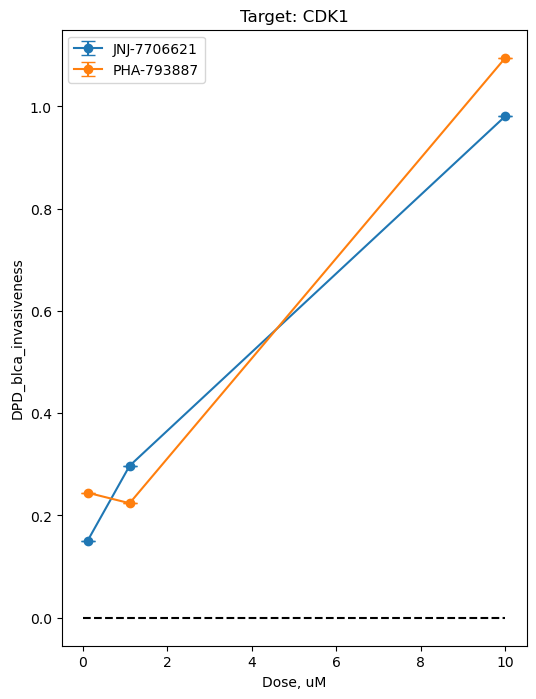

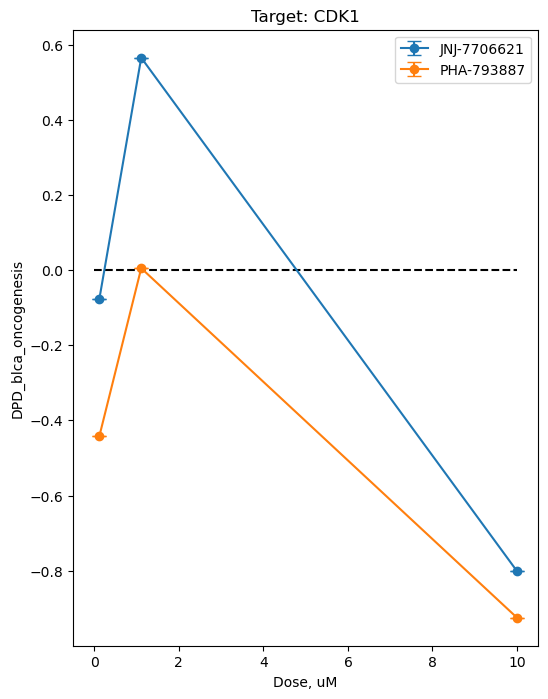

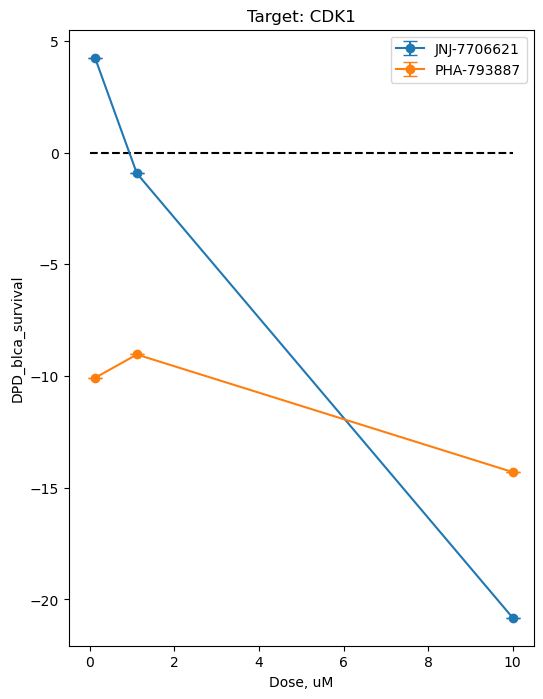

In [99]:
target_name = "CDK1"
target_drugs = ['JNJ-7706621', 'PHA-793887']

for DPD_val in states:
    plt.figure(figsize = (6,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [61]:
# delete OTS-167
print_drugs += ["CGP-60474", "dinaciclib", "PHA-767491", "roscovitine"]

In [62]:
# delete for roscovitine dose 3,33 uM
labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == "roscovitine") & (sig_info_cell_df.dose_float == 3.33)].index.to_list()
print(labels)

[]


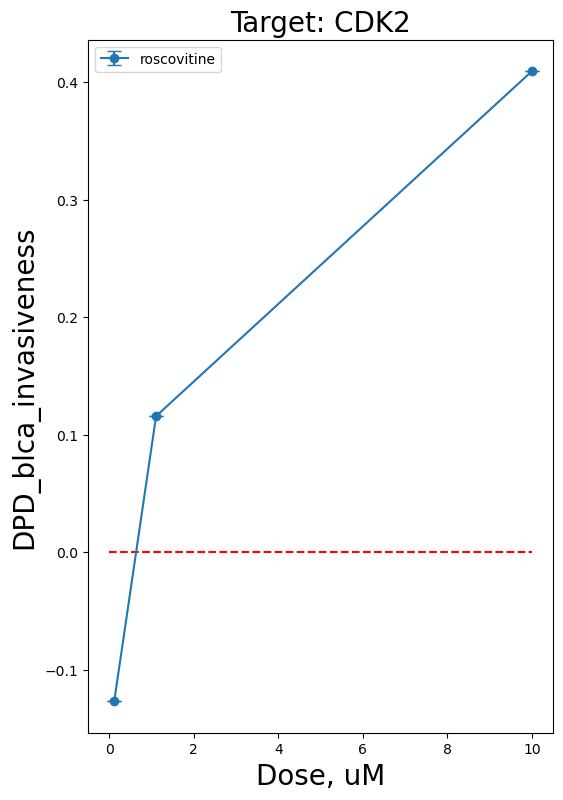

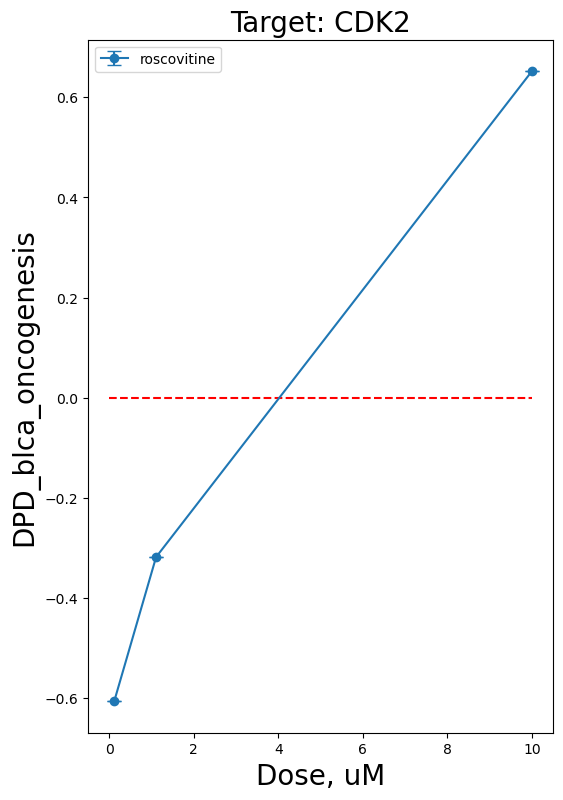

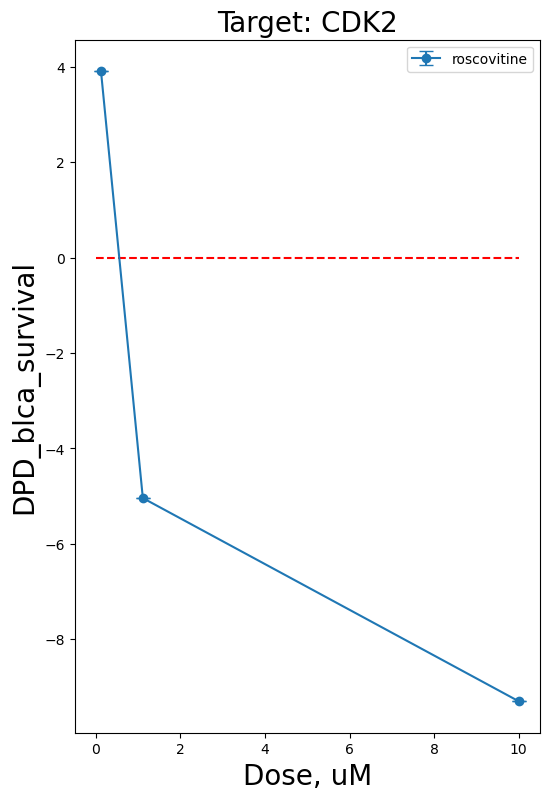

In [100]:
target_name = "CDK2"
target_drugs=['roscovitine']
#target_drugs = ["CGP-60474", "dinaciclib", "roscovitine", "OTS-167", "PHA-767491"]
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

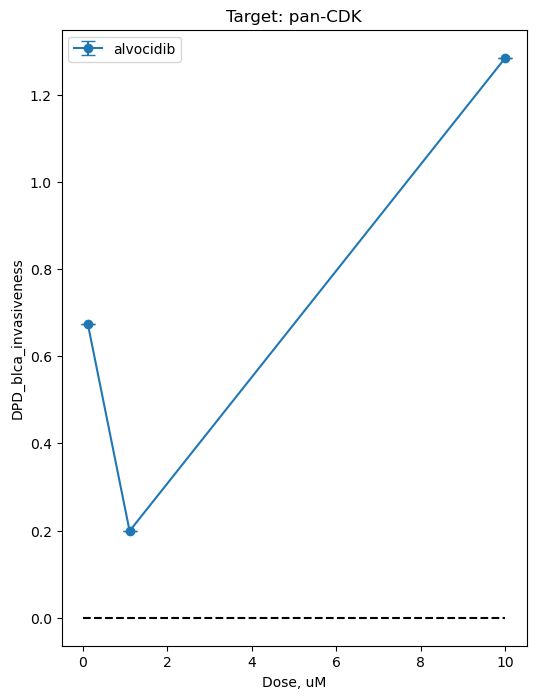

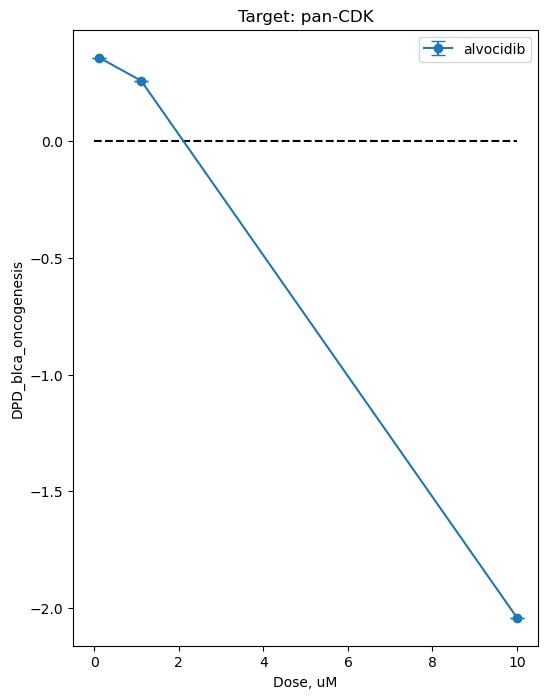

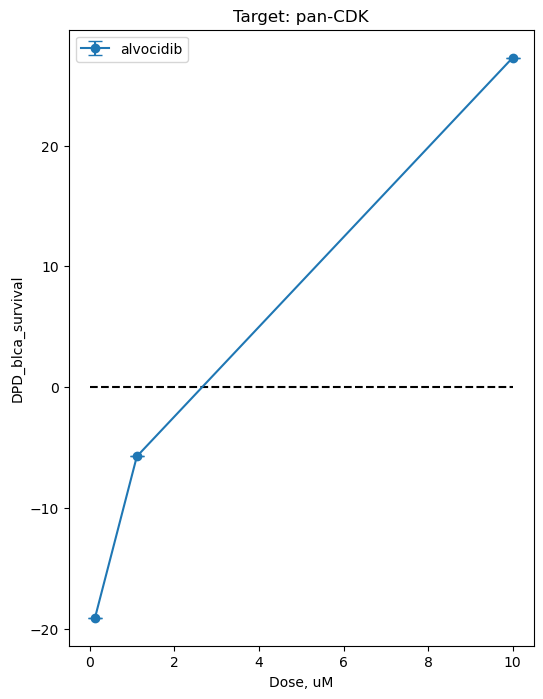

In [131]:
target_name = "pan-CDK"
target_drugs = ['alvocidib']

for DPD_val in states:
    plt.figure(figsize = (6,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### PI3K

In [104]:
target = "PIK3"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PIK3: 6 ['AS-605240', 'GDC-0349', 'LY-294002', 'NVP-BEZ235', 'PI-103', 'taselisib']


In [105]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AS-605240,PIK3CG,"0.12 uM, 1.11 uM, 10 uM"
GDC-0349,PIK3CA,"1.11 uM, 10 uM, 3.33 uM"
LY-294002,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC","0.12 uM, 1.11 uM, 10 uM"
NVP-BEZ235,"MTOR, PIK3CA, PIK3CD, PIK3CG","0.12 uM, 1.11 uM, 10 uM"
PI-103,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG","0.12 uM, 1.11 uM, 10 uM"
taselisib,PIK3CA,"1.11 uM, 10 uM"


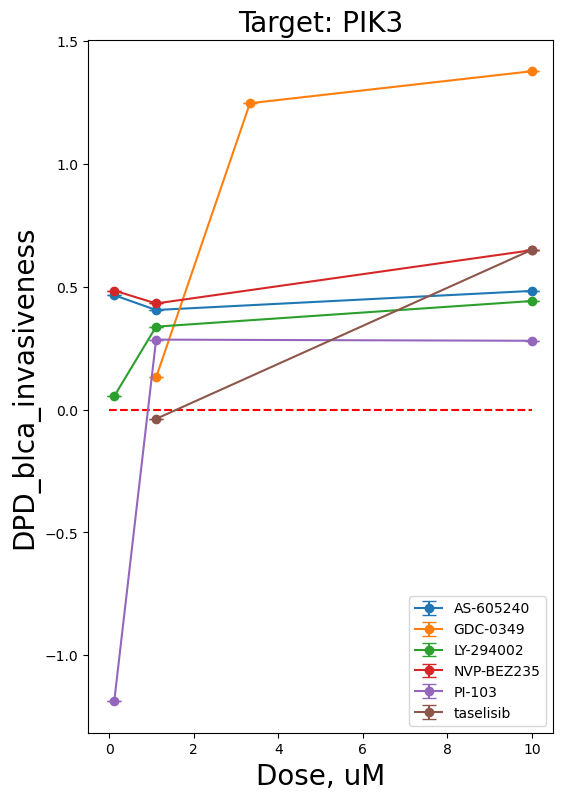

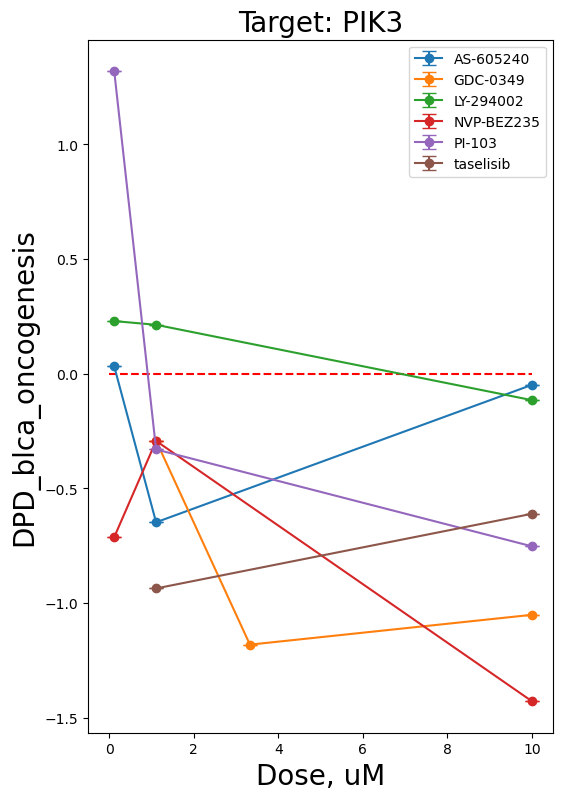

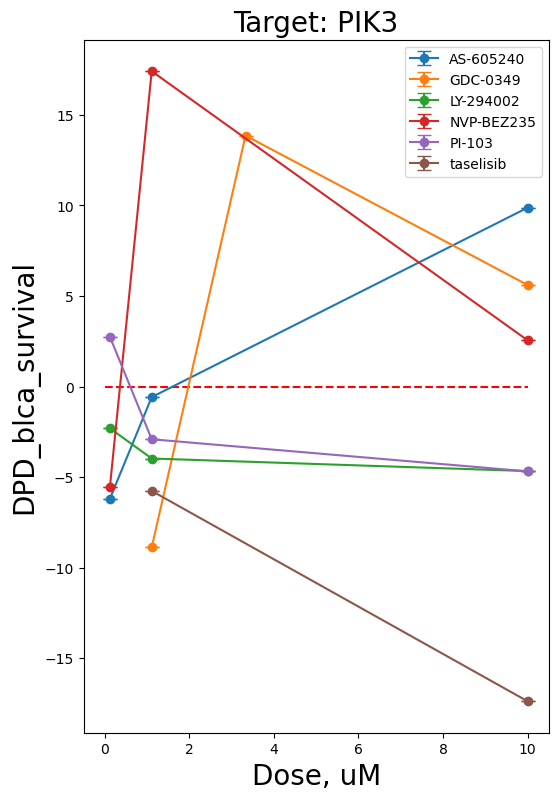

In [106]:
target_name = "PIK3"
target_drugs=drugs_list

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### ERK

In [67]:
target_name = "ERK"

target = "MAP2K"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "MAPK"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "RAF"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target ERK: 7 ['AZ-628', 'PD-0325901', 'dabrafenib', 'selumetinib', 'sorafenib', 'trametinib', 'vemurafenib']


In [68]:
drugs_list = drugs + ["RAF-265"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AZ-628,"BRAF, RAF1","0.12 uM, 1.11 uM, 10 uM"
PD-0325901,MAP2K1,"0.12 uM, 1.11 uM, 10 uM"
dabrafenib,BRAF,"0.12 uM, 1.11 uM, 10 uM"
selumetinib,MAP2K1,"0.12 uM, 1.11 uM, 10 uM"
sorafenib,"BRAF, DDR2, FGFR1, FLT1, FLT3, FLT4, KDR, KIT,...","0.12 uM, 1.11 uM, 10 uM"
trametinib,"MAP2K1, MAP2K2","0.12 uM, 10 uM"
vemurafenib,BRAF,"0.12 uM, 1.11 uM, 10 uM"
RAF-265,,


NameError: name 'out_dir' is not defined

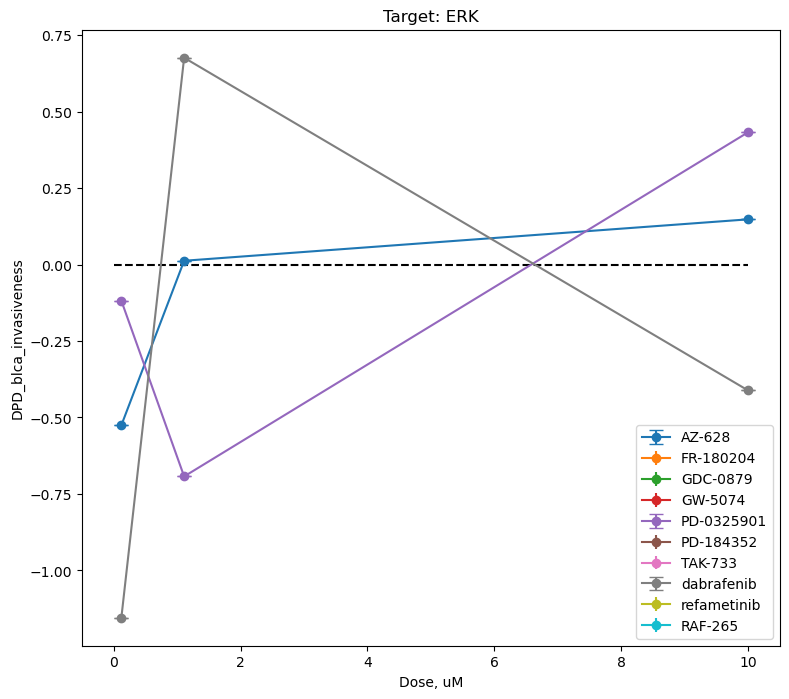

In [69]:
target_name = "ERK"
target_drugs = ["AZ-628", "FR-180204", "GDC-0879", "GW-5074", "PD-0325901", "PD-184352", "TAK-733", "dabrafenib", "refametinib", "RAF-265"]
# deleted SB-203580 (MAPK1)
# select only gene name RAF1, BRAF, MAP2K1, MAP2K2, MAPK1, MAPK3   (Kinase pathway RAF->MEK->ERK) = module "ERK2

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [ ]:
print_drugs += target_drugs

### SRC

In [107]:
target = "SRC"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target SRC: 1 ['dasatinib']


In [109]:
drugs_list = drugs +['ponatinib']

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
dasatinib,"ABL1, BCR, EPHA2, FYN, KIT, LCK, LYN, PDGFRB, ...","0.12 uM, 1.11 uM, 10 uM"
ponatinib,"ABL1, BCR, FGFR1, FGFR2, FGFR3, FGFR4, FLT3, K...","0.12 uM, 1.11 uM, 10 uM"


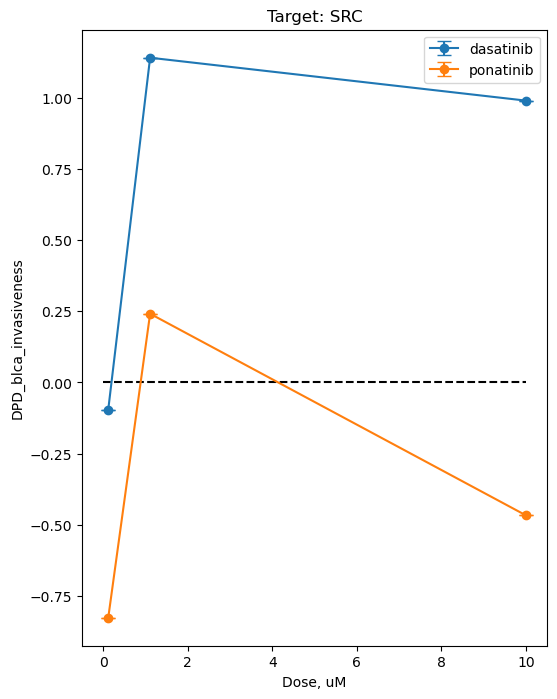

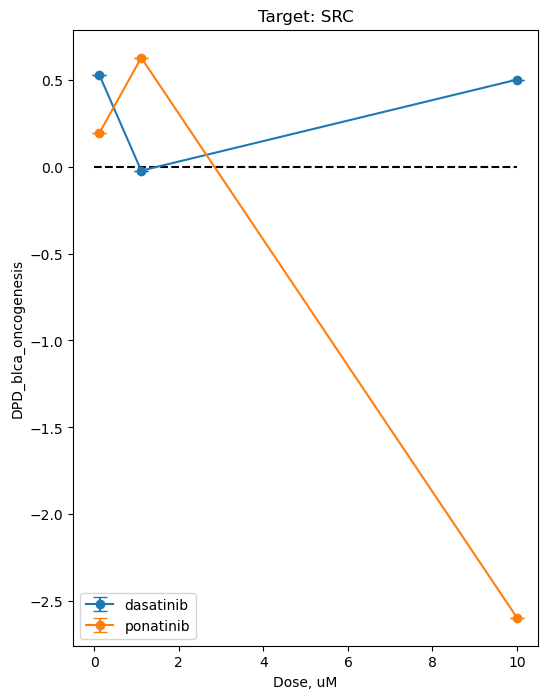

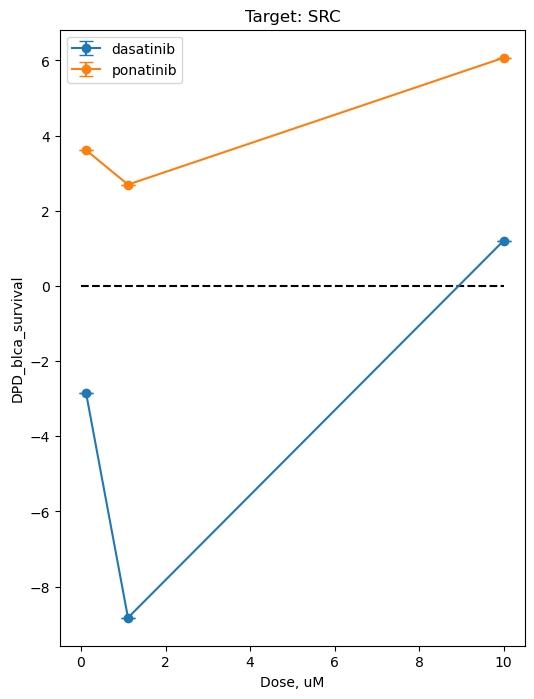

In [110]:
target_name = "SRC"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (6,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [ ]:
print_drugs += target_drugs

### EGFR

In [111]:
target = "EGFR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target EGFR: 6 ['afatinib', 'alvocidib', 'erlotinib', 'gefitinib', 'lapatinib', 'vandetanib']


In [112]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
afatinib,"EGFR, ERBB2, ERBB4","0.12 uM, 1.11 uM, 10 uM"
alvocidib,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9...","0.12 uM, 1.11 uM, 10 uM"
erlotinib,EGFR,"0.12 uM, 1.11 uM, 10 uM"
gefitinib,EGFR,"0.12 uM, 1.11 uM, 10 uM"
lapatinib,"EGFR, ERBB2","0.12 uM, 1.11 uM, 10 uM"
vandetanib,"EGFR, FLT1, FLT4, KDR, PTK6, RET, TEK","0.12 uM, 1.11 uM, 10 uM"


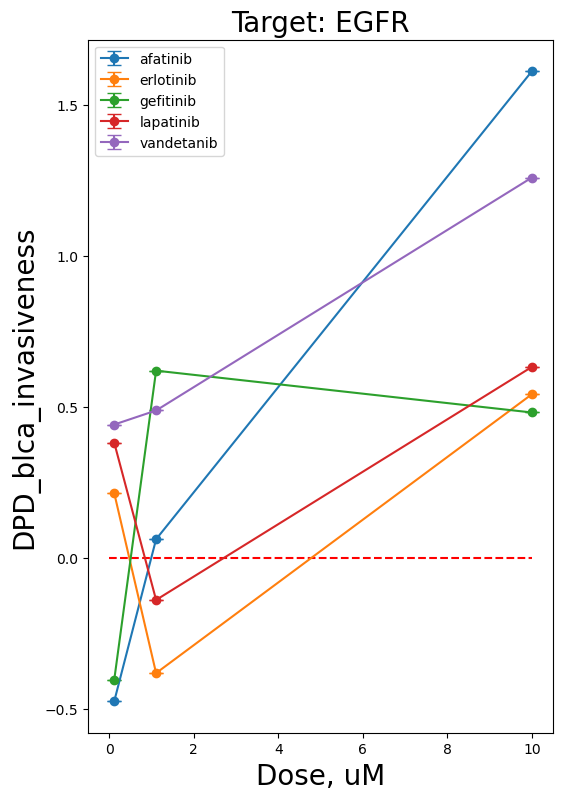

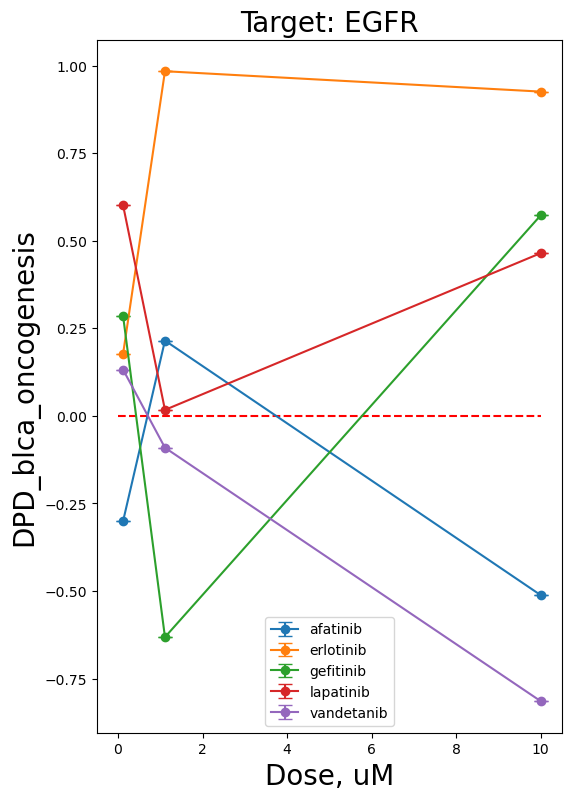

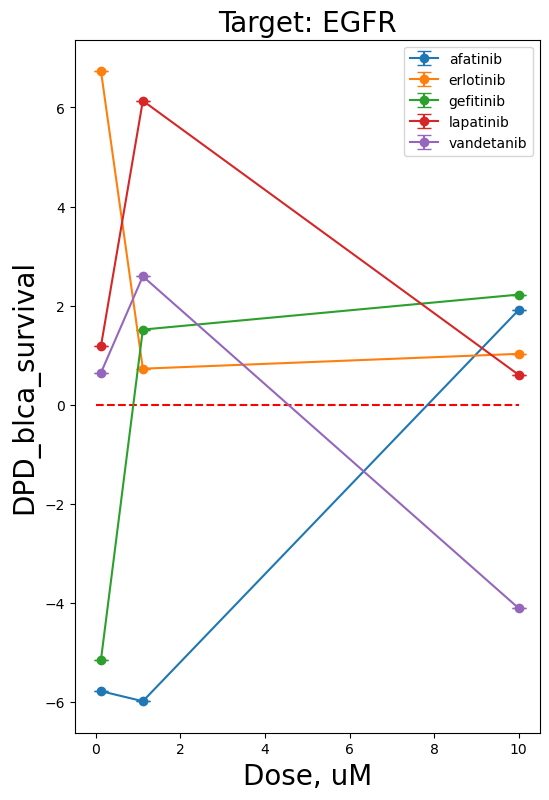

In [114]:
target_name = "EGFR"
target_drugs= drugs
#target_drugs = ["CGP-60474", "dinaciclib", "roscovitine", "OTS-167", "PHA-767491"]
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [ ]:
print_drugs += target_drugs

### FGFR

In [128]:
target = "FGFR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target FGFR: 3 ['masitinib', 'ponatinib', 'sorafenib']


In [129]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
masitinib,"FGFR3, KIT, LYN, PDGFRA, PDGFRB","0.12 uM, 1.11 uM, 10 uM"
ponatinib,"ABL1, BCR, FGFR1, FGFR2, FGFR3, FGFR4, FLT3, K...","0.12 uM, 1.11 uM, 10 uM"
sorafenib,"BRAF, DDR2, FGFR1, FLT1, FLT3, FLT4, KDR, KIT,...","0.12 uM, 1.11 uM, 10 uM"


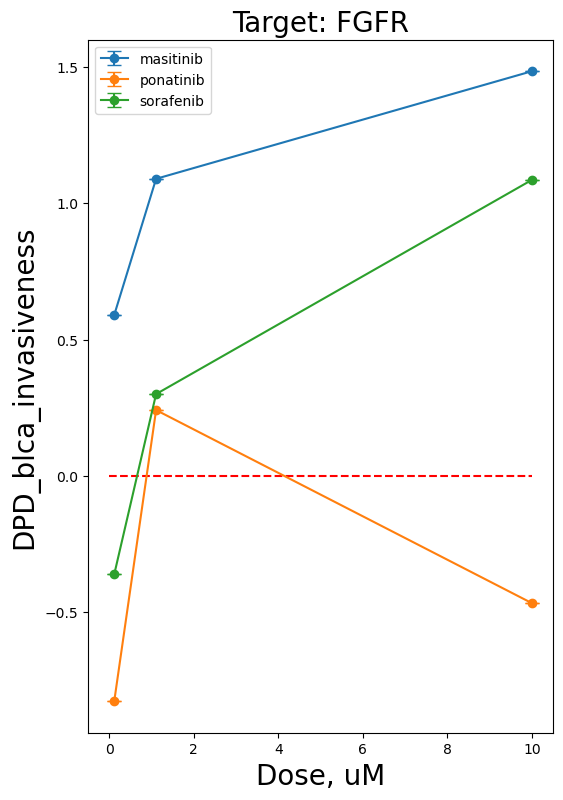

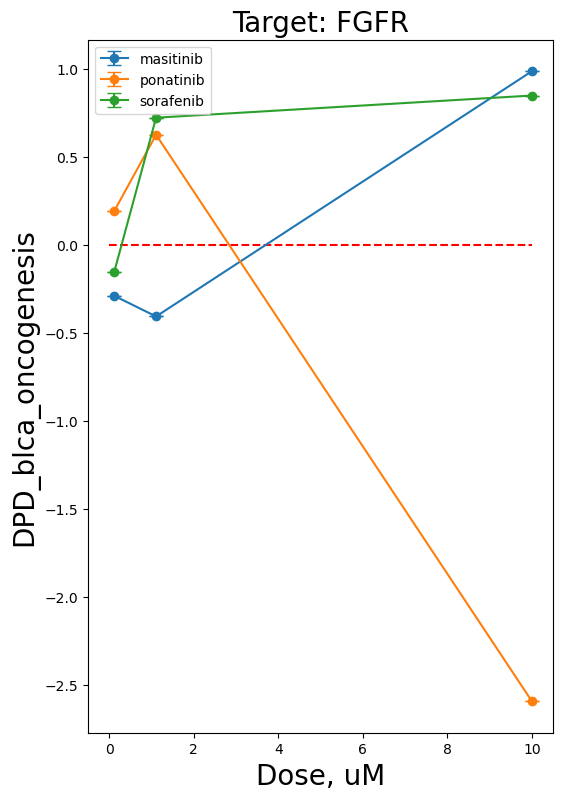

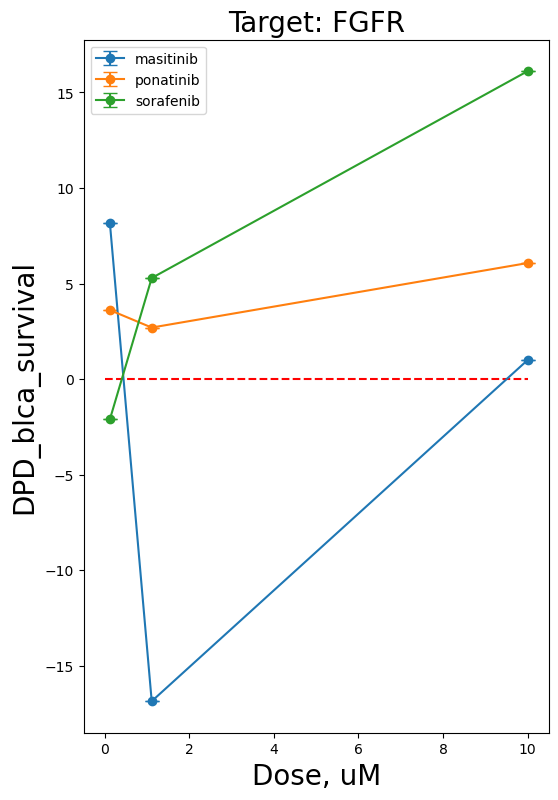

In [130]:
target_name = "FGFR"
target_drugs= drugs
#target_drugs = ["CGP-60474", "dinaciclib", "roscovitine", "OTS-167", "PHA-767491"]
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### TOP2A

In [115]:
target = "TOP2A"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target TOP2A: 4 ['daunorubicin', 'epirubicin', 'idarubicin', 'mitoxantrone']


In [116]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
daunorubicin,TOP2A,"0.12 uM, 1.11 uM"
epirubicin,TOP2A,"0.12 uM, 1.11 uM, 10 uM"
idarubicin,TOP2A,"0.12 uM, 1.11 uM"
mitoxantrone,TOP2A,"0.12 uM, 1.11 uM, 10 uM"


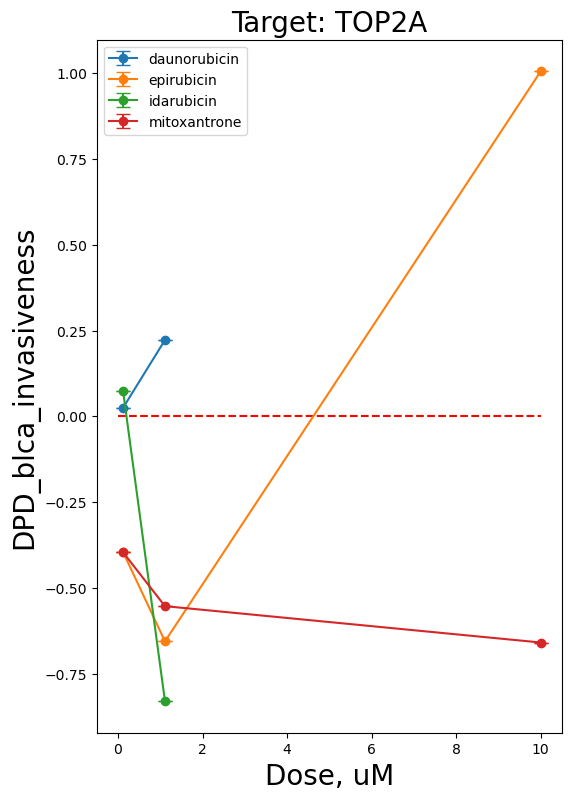

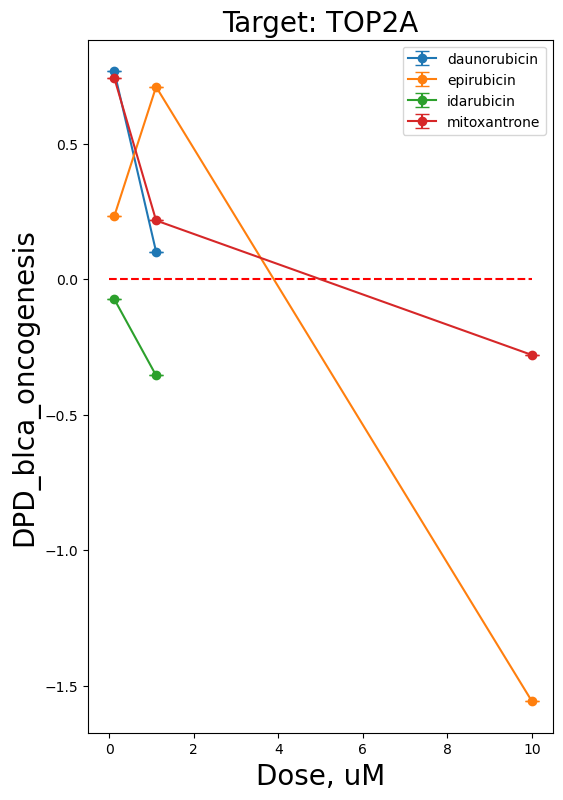

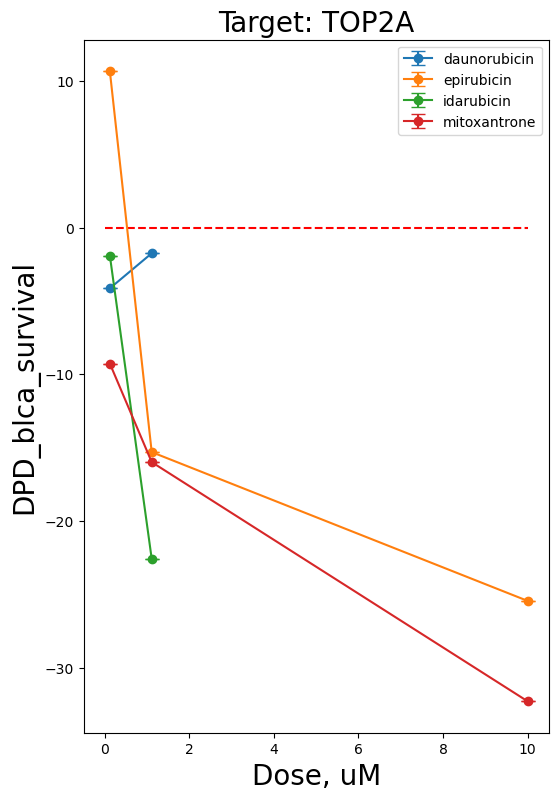

In [117]:
target_name = "TOP2A"
target_drugs= drugs
#target_drugs = ["CGP-60474", "dinaciclib", "roscovitine", "OTS-167", "PHA-767491"]
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### VEGFR

In [ ]:
drugs_list = ["rebastinib", "lenvatinib", "orantinib", "foretinib", "cediranib", "sunitinib", "tivozanib"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
rebastinib,,
lenvatinib,,
orantinib,,
foretinib,,
cediranib,,
sunitinib,,
tivozanib,,


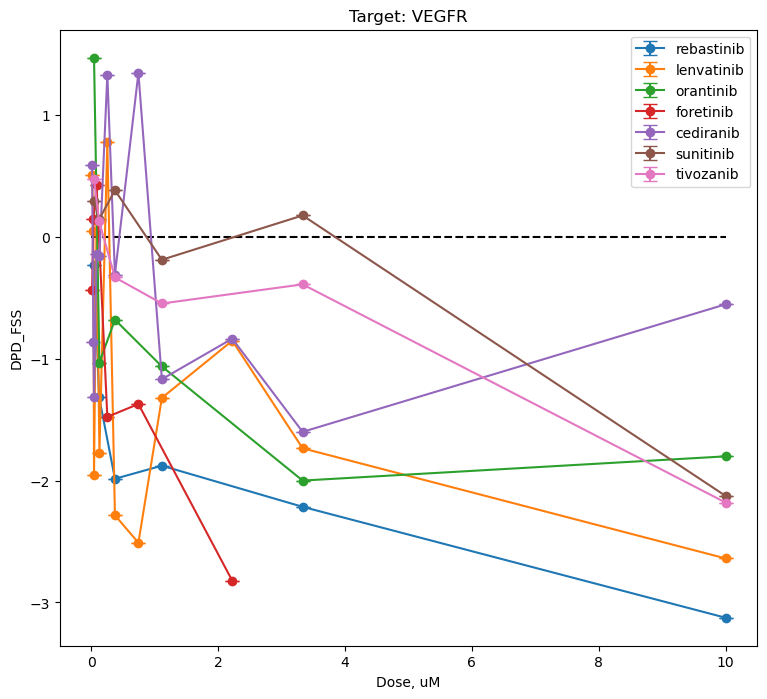

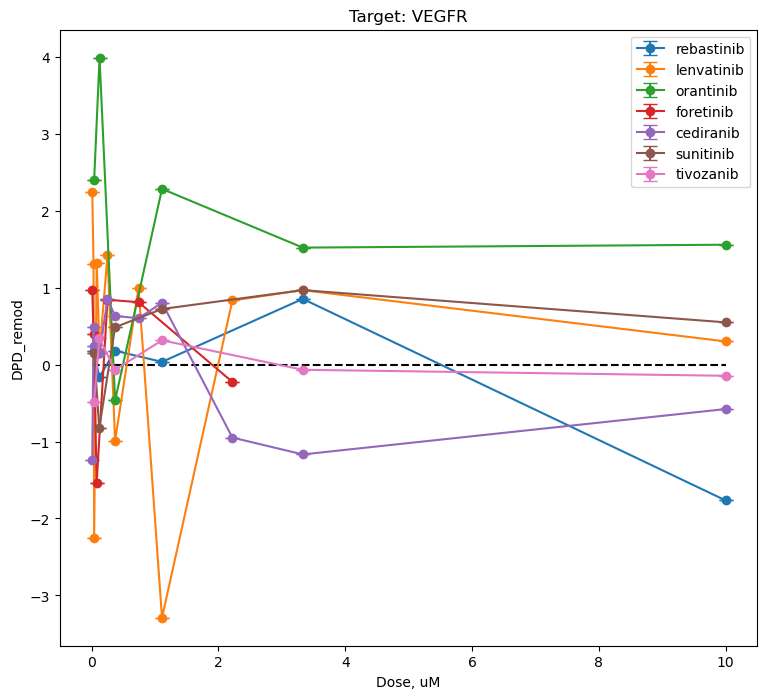

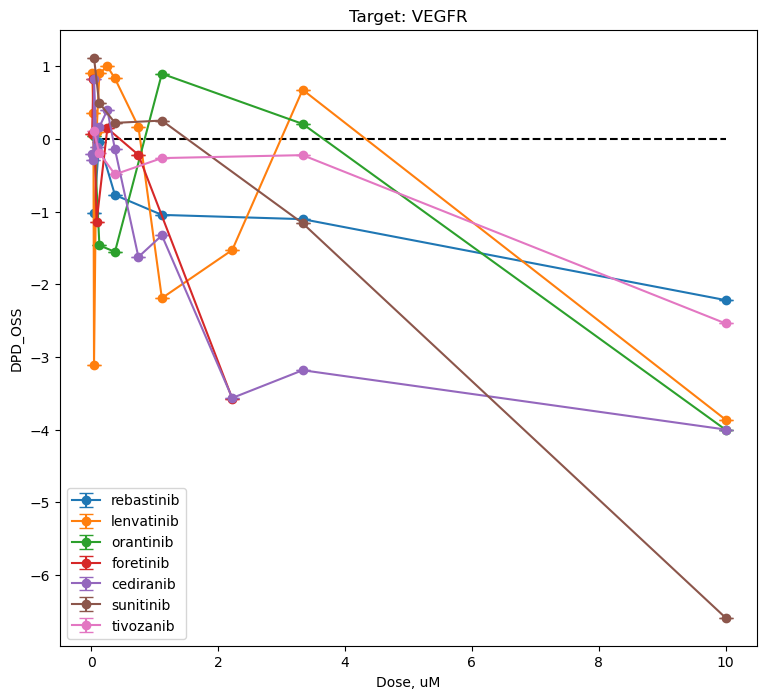

In [ ]:
target_name = "VEGFR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [ ]:
print_drugs += target_drugs

### p53

In [118]:
target = "MDM2"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target MDM2: 6 ['AMG-232', 'HLI-373', 'RITA', 'SAR405838', 'nutlin-3', 'serdemetan']


In [119]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AMG-232,MDM2,"0.12 uM, 1.11 uM, 10 uM"
HLI-373,MDM2,"1.11 uM, 10 uM, 3.33 uM"
RITA,MDM2,"0.08 uM, 1.11 uM, 10 uM, 3.33 uM"
SAR405838,MDM2,"1.11 uM, 10 uM, 3.33 uM"
nutlin-3,MDM2,"0.12 uM, 1.11 uM, 10 uM, 3.33 uM"
serdemetan,MDM2,"1.11 uM, 10 uM, 3.33 uM"


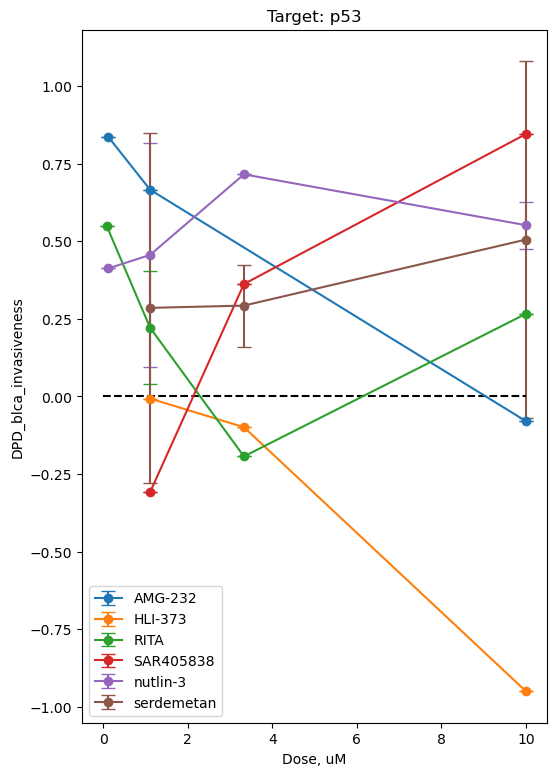

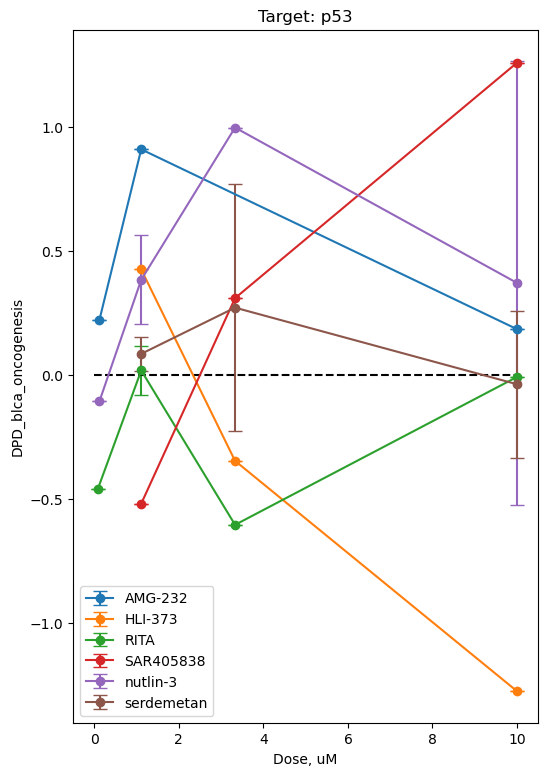

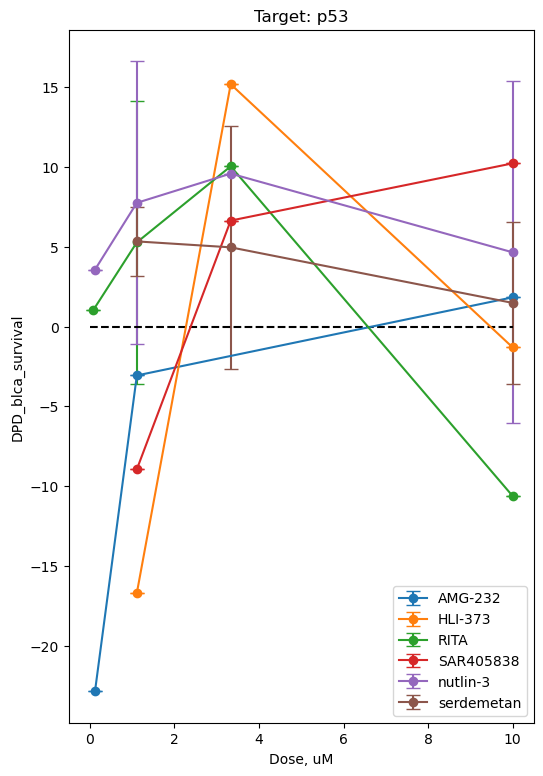

In [121]:
target_name = "p53"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

### Estrogen

In [122]:
target = "ESR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target ESR: 3 ['dienestrol', 'estradiol-cypionate', 'raloxifene']


In [ ]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
dienestrol,ESR1,"0.12 uM, 1.11 uM, 10 uM"
estradiol-cypionate,ESR1,"0.12 uM, 1.11 uM, 10 uM"
raloxifene,"ESR1, ESR2","0.12 uM, 1.11 uM, 10 uM"


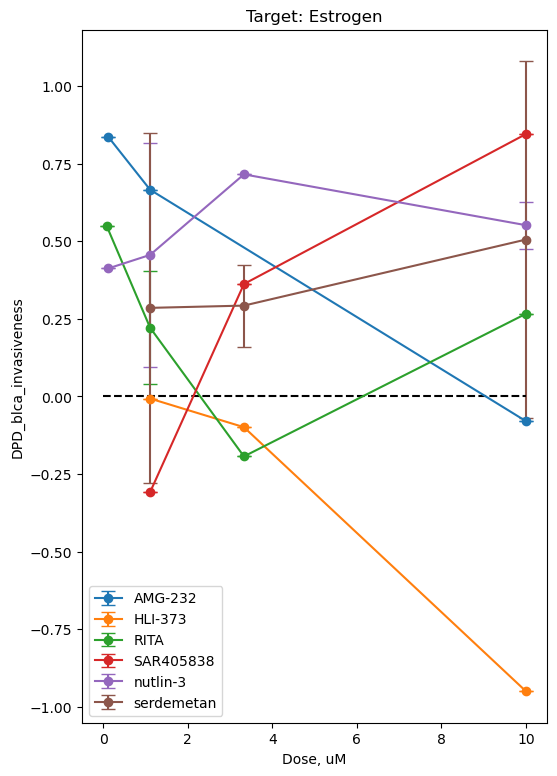

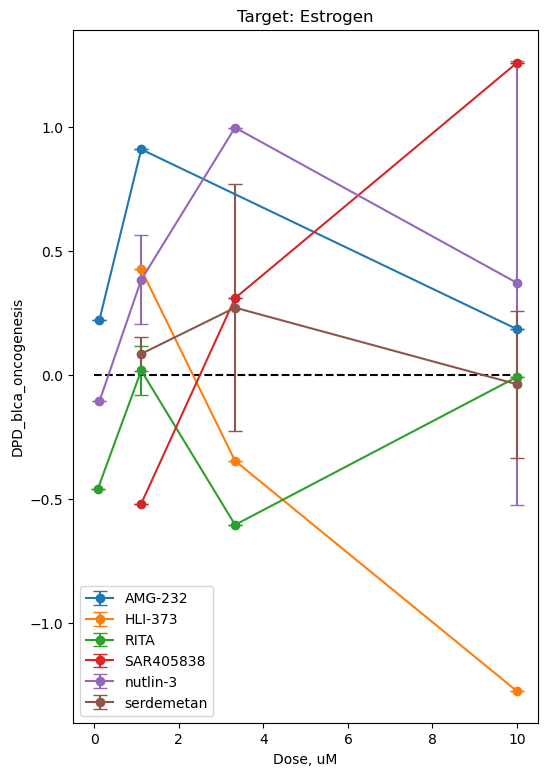

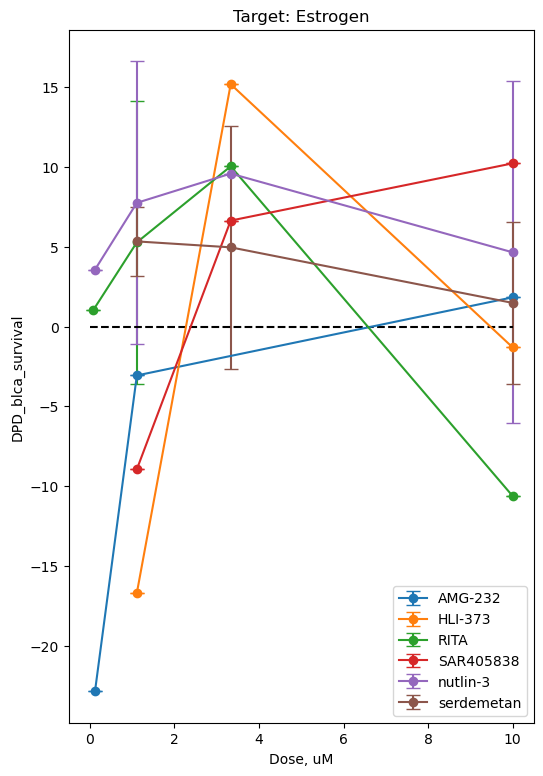

In [123]:
target_name = "Estrogen"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

### Androgen

In [124]:
target = "AR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target AR: 21 ['4-IBP', 'AG-14361', 'AM-580', 'API-001', 'BD-1063', 'GW-501516', 'L-693403', 'PRE-084', 'cutamesine', 'etofylline-clofibrate', 'flufenamic-acid', 'nandrolone', 'olaparib', 'oleoylethanolamide', 'oxandrolone', 'rimcazole', 'rucaparib', 'tamibarotene', 'testosterone-enanthate', 'testosterone-propionate', 'troglitazone']


In [125]:
drugs =['flufenamic-acid','nandrolone','testosterone-enanthate','testosterone-propionate']

In [126]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
flufenamic-acid,"AKR1C3, AR, PTGS1, PTGS2","1.11 uM, 10 uM, 3.33 uM"
nandrolone,"AR, CYP19A1, MAOA, MAOB, NISCH",10 uM
testosterone-enanthate,AR,"10 uM, 3.33 uM"
testosterone-propionate,AR,"1.11 uM, 10 uM, 3.33 uM"


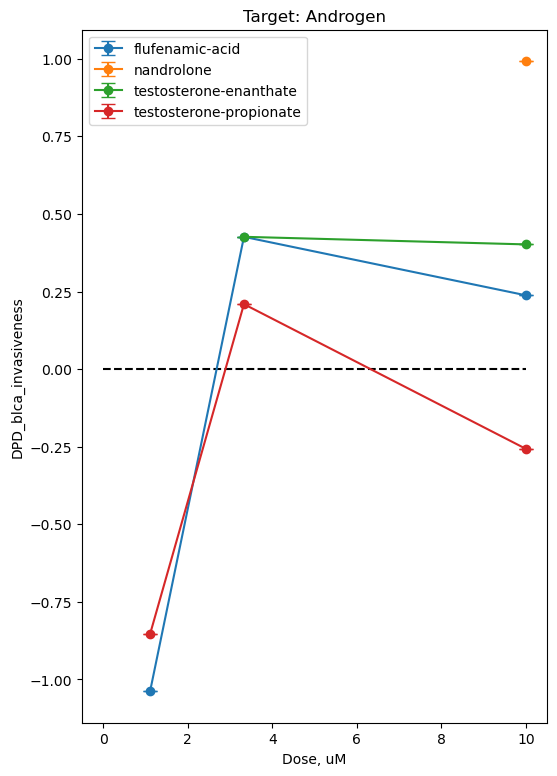

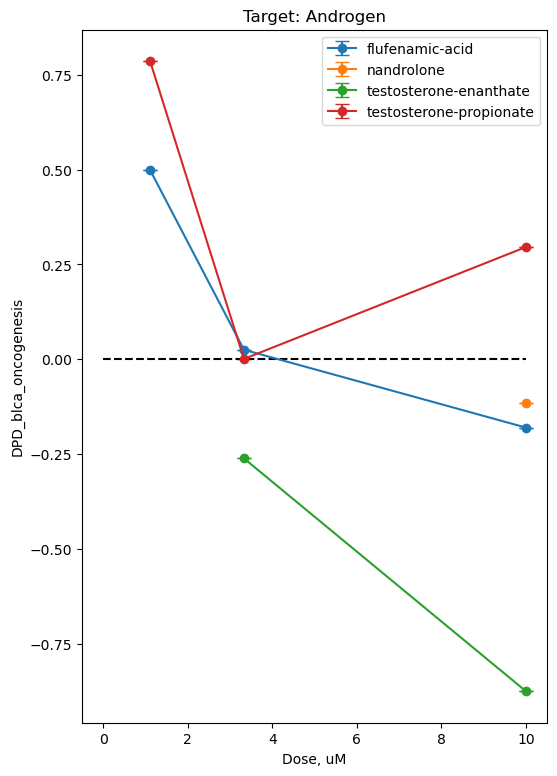

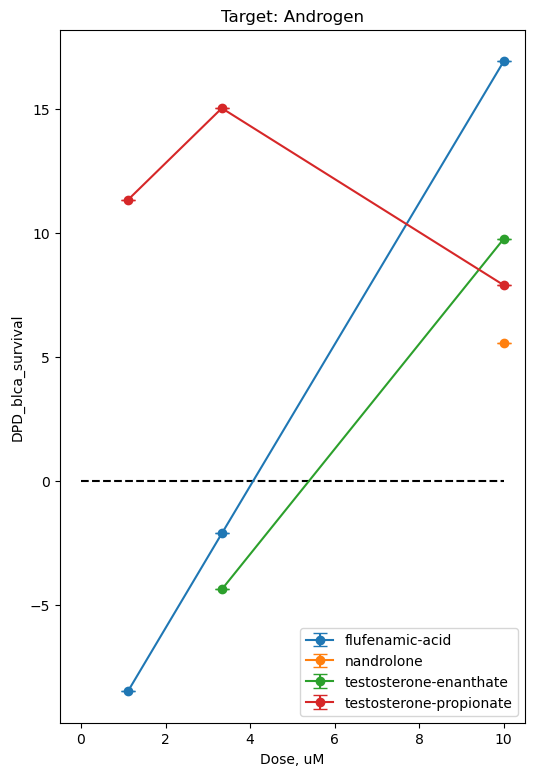

In [127]:
target_name = "Androgen"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [ ]:
# delete module "PPARG"

In [ ]:
print(print_drugs)

print_drugs_df = pd.DataFrame(print_drugs)
display(print_drugs_df)

print_drugs_df.to_excel("drugs.xlsx")

['CGP-60474', 'dinaciclib', 'PHA-767491', 'roscovitine', 'PF-03758309', 'PF-04691502', 'XL-147', 'GSK-2334470', 'A-66', 'BGT-226', 'BX-795', 'AZ-628', 'FR-180204', 'GDC-0879', 'GW-5074', 'PD-0325901', 'PD-184352', 'TAK-733', 'dabrafenib', 'refametinib', 'RAF-265', 'I-BET-762', 'I-BET-151', 'JQ-1-R', 'PFI-1', 'GSK-1070916', 'MLN-8054', 'ZM-447439', 'alisertib', 'SB-525334', 'rebastinib', 'lenvatinib', 'orantinib', 'foretinib', 'cediranib', 'sunitinib', 'tivozanib', 'enzastaurin', 'MG-132', 'bortezomib', 'ixazomib']


,0
0,CGP-60474
1,dinaciclib
2,PHA-767491
3,roscovitine
4,PF-03758309
5,PF-04691502
6,XL-147
7,GSK-2334470
8,A-66
9,BGT-226
